In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import dask.dataframe
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg

from matplotlib.lines import Line2D
from sklearn.ensemble import RandomForestClassifier

## Form signatures

In [2]:
%time data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
%time data = data.replace([np.inf, -np.inf], np.nan).fillna(0)
%time data = data.compute()

CPU times: user 38.8 s, sys: 35.3 s, total: 1min 14s
Wall time: 1min 44s
CPU times: user 27.6 ms, sys: 0 ns, total: 27.6 ms
Wall time: 23.8 ms
CPU times: user 1min 7s, sys: 43.2 s, total: 1min 50s
Wall time: 1min 51s


In [3]:
data

,sdbAre_q1,sdbAre_q2,sdbAre_q3,sdbPer_q1,sdbPer_q2,sdbPer_q3,sdbCoA_q1,sdbCoA_q2,sdbCoA_q3,ssbCCo_q1,...,lseCWA_q3,lteOri_q1,lteOri_q2,lteOri_q3,lteWNB_q1,lteWNB_q2,lteWNB_q3,lieWCe_q1,lieWCe_q2,lieWCe_q3
hindex,,,,,,,,,,,,,,,,,,,,,
c000e094707t0000,-0.947406,-0.371977,0.020285,-0.901199,-0.237045,-0.023143,-0.000419,-0.001515,-0.010221,-0.046170,...,0.073064,0.031571,0.196520,0.424415,-0.611681,-0.502087,-0.311160,-0.022562,-0.002733,-0.004738
c000e094763t0000,-0.913567,-0.420861,-0.271703,-0.903627,-0.428003,-0.336729,-0.000419,-0.001515,-0.010221,-0.035325,...,-0.254395,-1.016655,-0.161371,0.011093,0.148709,0.214520,-0.125943,-0.019044,-0.002654,-0.004738
c000e094763t0001,-0.878137,-0.411587,-0.284021,-0.900393,-0.416250,-0.350010,-0.000419,-0.001515,-0.010221,-0.034917,...,-0.285074,-0.897625,-0.161371,0.103698,0.148709,0.250036,-0.200268,-0.019323,-0.002654,-0.004738
c000e094763t0002,-0.952475,-0.421566,-0.283919,-0.968400,-0.429947,-0.343165,-0.000419,-0.001515,-0.010221,-0.065649,...,-0.280682,-0.927382,-0.161371,0.177408,0.302689,0.250036,-0.120718,-0.018825,-0.002654,-0.004738
c000e094764t0000,-0.964878,-0.420861,-0.271703,-0.972440,-0.420006,-0.315861,-0.000419,-0.001515,-0.010221,-0.066832,...,-0.280682,-1.016655,-0.104108,0.185348,0.302689,0.250036,-0.105044,-0.018825,-0.002659,-0.004738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c102e644989t0111,-0.311466,-0.431706,-0.373463,-0.082269,-0.459270,-0.389532,-0.000419,-0.001515,-0.010221,0.132837,...,0.199797,1.288365,0.440493,0.197816,-0.351250,-0.580453,-0.704637,-0.000200,-0.002667,-0.004738
c102e644989t0112,-0.326671,-0.461825,-0.371855,-0.149873,-0.528701,-0.386678,-0.000419,-0.001515,-0.010221,0.136559,...,0.195101,1.288365,0.440493,0.290197,-0.351250,-0.580453,-0.693005,-0.000669,-0.002667,-0.004738
c102e644989t0113,-0.094236,-0.364761,-0.304254,0.024972,-0.347371,-0.283669,-0.000419,-0.001515,-0.010221,0.021411,...,0.199797,1.288365,0.440493,0.197816,-0.351250,-0.580453,-0.704637,-0.000843,-0.002667,-0.004738


In [4]:
labels_l1 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k8_form_labels.pq")
labels_l2_4 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_form_labels.pq")
labels_l2_2 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c2_form_labels.pq")

In [5]:
labels = labels_l1.copy()
labels.loc[labels.k8 == 4, 'k8'] = labels_l2_4['9'].values + 40
labels.loc[labels.k8 == 2, 'k8'] = labels_l2_2['8'].values + 20

In [6]:
labels.k8.value_counts()

1     5544712
5     3774274
0     1554431
25     681861
22     664692
21     511727
23     502758
26     425631
27     275571
20     250872
24     138339
40     111659
3       62701
42      31800
45       5105
41       1680
47       1128
7         477
43         79
46         65
48          9
44          4
6           3
Name: k8, dtype: int64

In [7]:
outliers = [6, 44, 48, 43]
mask = ~labels.k8.isin(outliers)

## Overall similarity

Similarity of clusters can be represented by hierarchical dendrogram generated using Ward's agglomerative clustering.

In [8]:
from scipy.cluster import hierarchy

group = data.loc[mask].groupby(labels.loc[mask]['k8'].values).mean() # cluster centroids

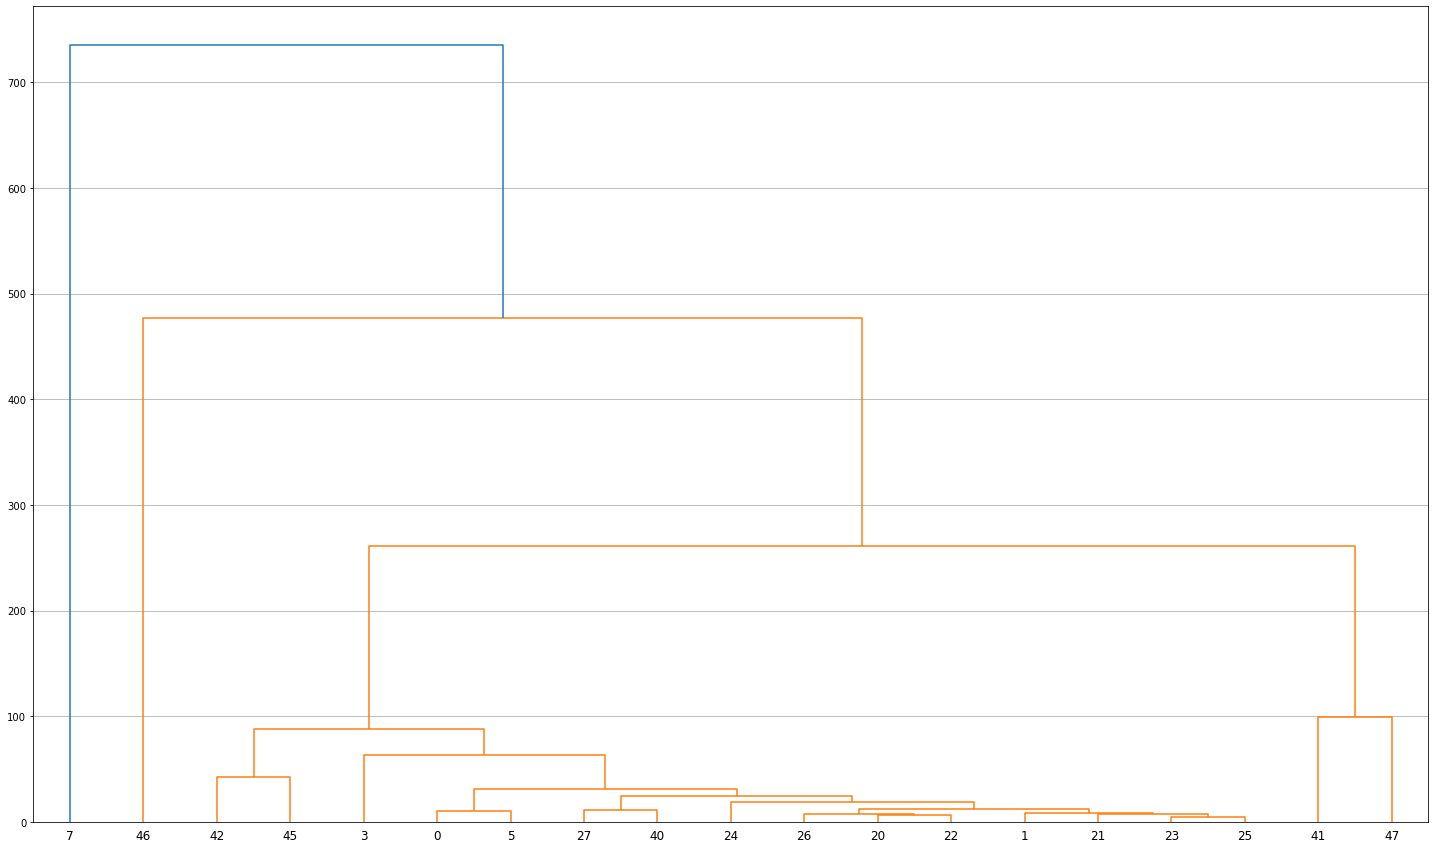

In [9]:
Z = hierarchy.linkage(group, 'ward')
fig, ax = plt.subplots(figsize=(25, 15))
dn = hierarchy.dendrogram(Z, labels=group.index)
plt.grid(True, axis='y', which='both')

## Feature importance per cluster

In [12]:
labels.k8.unique()

array([ 0,  5, 20, 24,  1, 21, 25, 22, 26, 23, 27, 40, 42,  3, 48, 45,  7,
        6, 41, 47, 46, 44, 43], dtype=int32)

In [15]:
imps = pd.DataFrame()

In [16]:
for cluster in labels.k8.unique():
    if cluster not in outliers:
        cluster_bool = labels.loc[mask]['k8'].apply(lambda x: 1 if x == cluster else 0)

        clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, verbose=1)
        clf = clf.fit(data.loc[mask].values, cluster_bool.values)

        importances = pd.Series(clf.feature_importances_, index=data.columns).sort_values(ascending=False)

        imps[f'cluster_{cluster}'] = importances.head(50).index.values
        imps[f'cluster_{cluster}_vals'] = importances.head(50).values

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


In [17]:
chars = [c for c in imps.columns if 'vals' not in c]
imps[sorted(chars)]

,cluster_0,cluster_1,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_3,cluster_40,cluster_41,cluster_42,cluster_45,cluster_46,cluster_47,cluster_5,cluster_7
0,sdcLAL_q2,stbCeA_q1,lteWNB_q3,ssbCCM_q3,stcOri_q2,stcOri_q1,mtdDeg_q3,linPDE_q2,lisCel_q2,sdbAre_q3,mtcWNe_q1,ssbCor_q3,ssbCCD_q2,ssbCor_q3,ssbCCD_q2,sdbCoA_q2,sdbAre_q3,sicCAR_q1,sddAre_q2
1,sdcAre_q2,sicCAR_q1,mtdDeg_q3,sdbPer_q3,stbOri_q3,stcOri_q2,linP4W_q1,linPDE_q3,ltcWRE_q3,ssbCCM_q3,sicCAR_q1,ssbERI_q1,ssbSqu_q1,ssbCCD_q2,ssbERI_q2,sdbAre_q2,sdbCoA_q3,mtcWNe_q2,mdsAre_q2
2,sisBpM_q2,mtcWNe_q1,ldePer_q2,sdbAre_q3,stbSAl_q1,stbOri_q1,linP4W_q3,ssbCCo_q2,ltcRea_q1,sdbPer_q3,sdcLAL_q3,sdbAre_q3,sdbAre_q3,ssbSqu_q3,ssbCor_q2,ldePer_q2,ssbCCM_q3,mtcWNe_q1,sdsAre_q2
3,sisBpM_q3,stbCeA_q2,lteWNB_q2,ssbCCo_q1,stbCeA_q1,stbOri_q2,linP4W_q2,stcOri_q2,misCel_q2,sdbAre_q2,ltcAre_q3,ssbCCD_q3,ssbCor_q3,sdbPer_q3,sdbAre_q2,sdbAre_q3,sdbPer_q3,sdcLAL_q3,ldsAre_q2
4,ltcAre_q1,mtbNDi_q2,ltcWRE_q3,ssbElo_q1,stcOri_q3,ssbSqu_q1,linP3W_q2,linPDE_q1,ldePer_q2,ssbCCD_q3,ltbIBD_q2,sdbPer_q3,sdbPer_q2,sdbAre_q3,sdbAre_q3,sicCAR_q1,sicCAR_q1,ltbIBD_q2,lseCWA_q1
5,mtcWNe_q1,stbSAl_q1,linPDE_q2,ssbCCM_q2,ldePer_q2,ldeAre_q1,linP3W_q3,stbOri_q2,linPDE_q3,stbCeA_q1,sdsAre_q2,ssbCCD_q2,sdsSWD_q2,ssbERI_q2,ssbSqu_q2,sdbCoA_q3,ssbSqu_q3,mtbNDi_q2,ldsAre_q1
6,mtbNDi_q2,sdcAre_q2,lteWNB_q1,sdbPer_q2,ssbCCo_q2,stbCeA_q1,xcnSCl_q2,lcdMes_q2,lisCel_q1,ssbCCD_q2,ltcAre_q1,ssbSqu_q3,ssbSqu_q2,sdbAre_q2,sdbPer_q3,sdsAre_q2,sdbAre_q2,sdsAre_q2,mtdMDi_q1
7,ltcWRE_q3,ldePer_q2,linPDE_q3,ssbCCo_q2,stbCeA_q3,stbSAl_q2,lcdMes_q1,stcOri_q3,linPDE_q2,ssbCCM_q2,ltcWRE_q3,sdbPer_q2,ssbCCD_q1,ssbERI_q1,sdbPer_q1,sdsLen_q2,misCel_q3,ldsAre_q2,ltcWRE_q1
8,ldsAre_q1,linPDE_q3,ldeAre_q2,stbCeA_q3,lteOri_q2,linP4W_q2,lcdMes_q2,ssbCCM_q3,ltcRea_q2,sdbPer_q2,ldsAre_q2,sdbAre_q2,sdbCoA_q3,ssbCor_q2,ssbSqu_q3,ssbCCM_q1,lseERI_q2,sisBpM_q2,sddAre_q3
9,sscERI_q2,sdcLAL_q3,sdbAre_q3,linPDE_q3,stcOri_q1,ssbCCM_q3,ldsMSL_q2,stbCeA_q1,mtdDeg_q3,ssbCCo_q1,lcnClo_q2,ssbCCM_q2,ssbCor_q2,ssbCCD_q3,ssbERI_q3,ssbSqu_q2,stcOri_q1,sddAre_q3,sddAre_q1


In [18]:
imps.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/per_cluster_importance_form.pq")

### Extremes

<AxesSubplot:>

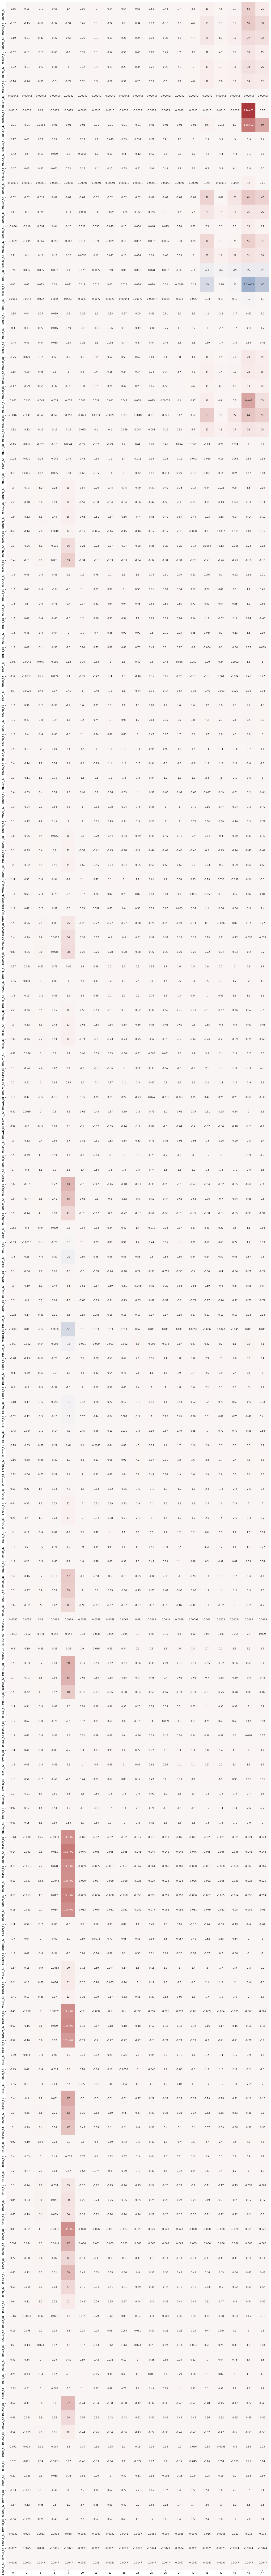

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 200))
sns.heatmap(group.T, cmap="vlag", center=0, annot=True, cbar=False)
# plt.savefig("../../urbangrammar_samba/spatial_signatures/clustering_data/spsig_heatmap.pdf", bbox_inches="tight")

<AxesSubplot:>

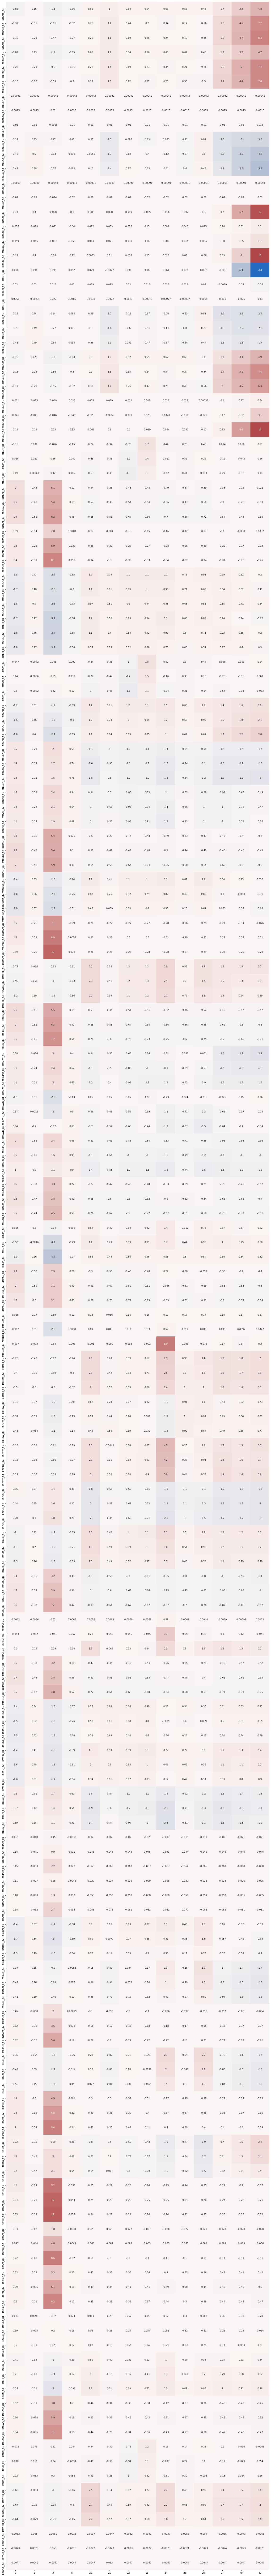

In [12]:
fig, ax = plt.subplots(figsize=(20, 200))
sns.heatmap(group.T.drop(columns=[7,41, 45, 46, 47]), cmap="vlag", center=0, annot=True, cbar=False)
# plt.savefig("../../urbangrammar_samba/spatial_signatures/clustering_data/spsig_heatmap.pdf", bbox_inches="tight")